In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Building_Permits.csv', low_memory=False)

In [3]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [5]:
df.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,29479.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,78.517182,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162048e+12
std,1.457451,1135.768948,326.981324,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918215e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,94109.000000,1.308567e+12
50%,8.000000,710.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371840e+12
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.500000e+04,2.870750e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435000e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12


In [6]:
total_faltante = df.isnull().sum()
total_faltante

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [7]:
celdas_faltantes = np.product(df.shape)
total_perdido = total_faltante.sum()
porcentaje_perdido = (total_perdido/celdas_faltantes) * 100
print(porcentaje_perdido)

26.26002315058403


In [8]:
df_droprow = df.dropna()
df_droprow

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


array([[<AxesSubplot: title={'center': 'Unit'}>]], dtype=object)

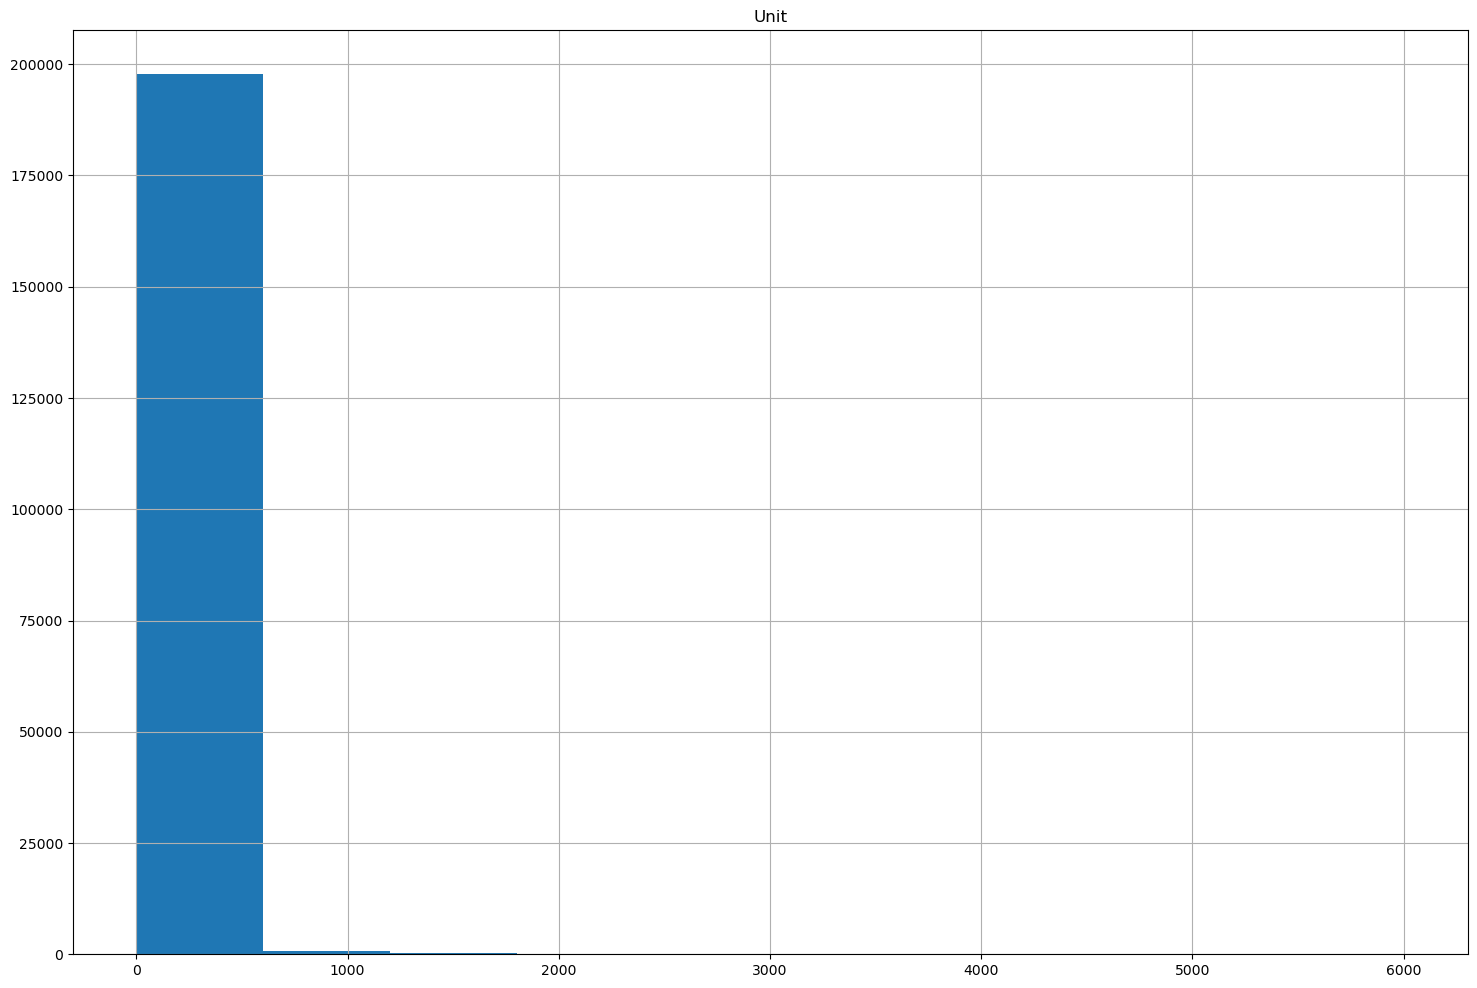

In [20]:
df.hist('Unit', figsize=(18,12))

array([[<AxesSubplot: title={'center': 'Permit Type'}>,
        <AxesSubplot: title={'center': 'Street Number'}>,
        <AxesSubplot: title={'center': 'Unit'}>,
        <AxesSubplot: title={'center': 'Number of Existing Stories'}>],
       [<AxesSubplot: title={'center': 'Number of Proposed Stories'}>,
        <AxesSubplot: title={'center': 'Estimated Cost'}>,
        <AxesSubplot: title={'center': 'Revised Cost'}>,
        <AxesSubplot: title={'center': 'Existing Units'}>],
       [<AxesSubplot: title={'center': 'Proposed Units'}>,
        <AxesSubplot: title={'center': 'Plansets'}>,
        <AxesSubplot: title={'center': 'Existing Construction Type'}>,
        <AxesSubplot: title={'center': 'Proposed Construction Type'}>],
       [<AxesSubplot: title={'center': 'Supervisor District'}>,
        <AxesSubplot: title={'center': 'Zipcode'}>,
        <AxesSubplot: title={'center': 'Record ID'}>, <AxesSubplot: >]],
      dtype=object)

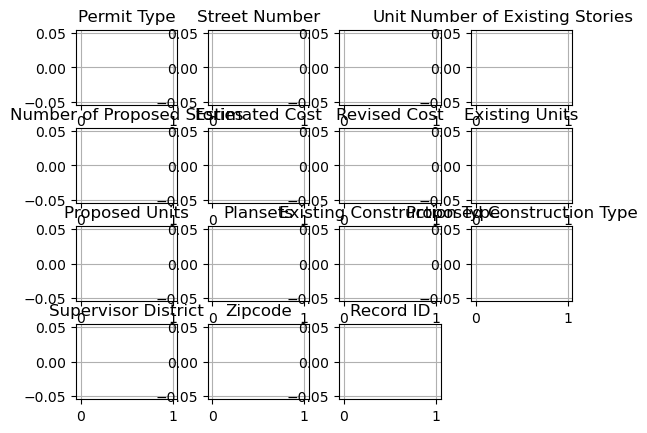

In [10]:
df_droprow.hist()

In [11]:
df_filling_na = df.fillna(method = 'bfill', axis = 0).fillna(0)

In [12]:
df_filling_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    198900 non-null  object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           198900 non-null  object 
 10  Unit                                    1989

array([[<AxesSubplot: title={'center': 'Unit'}>]], dtype=object)

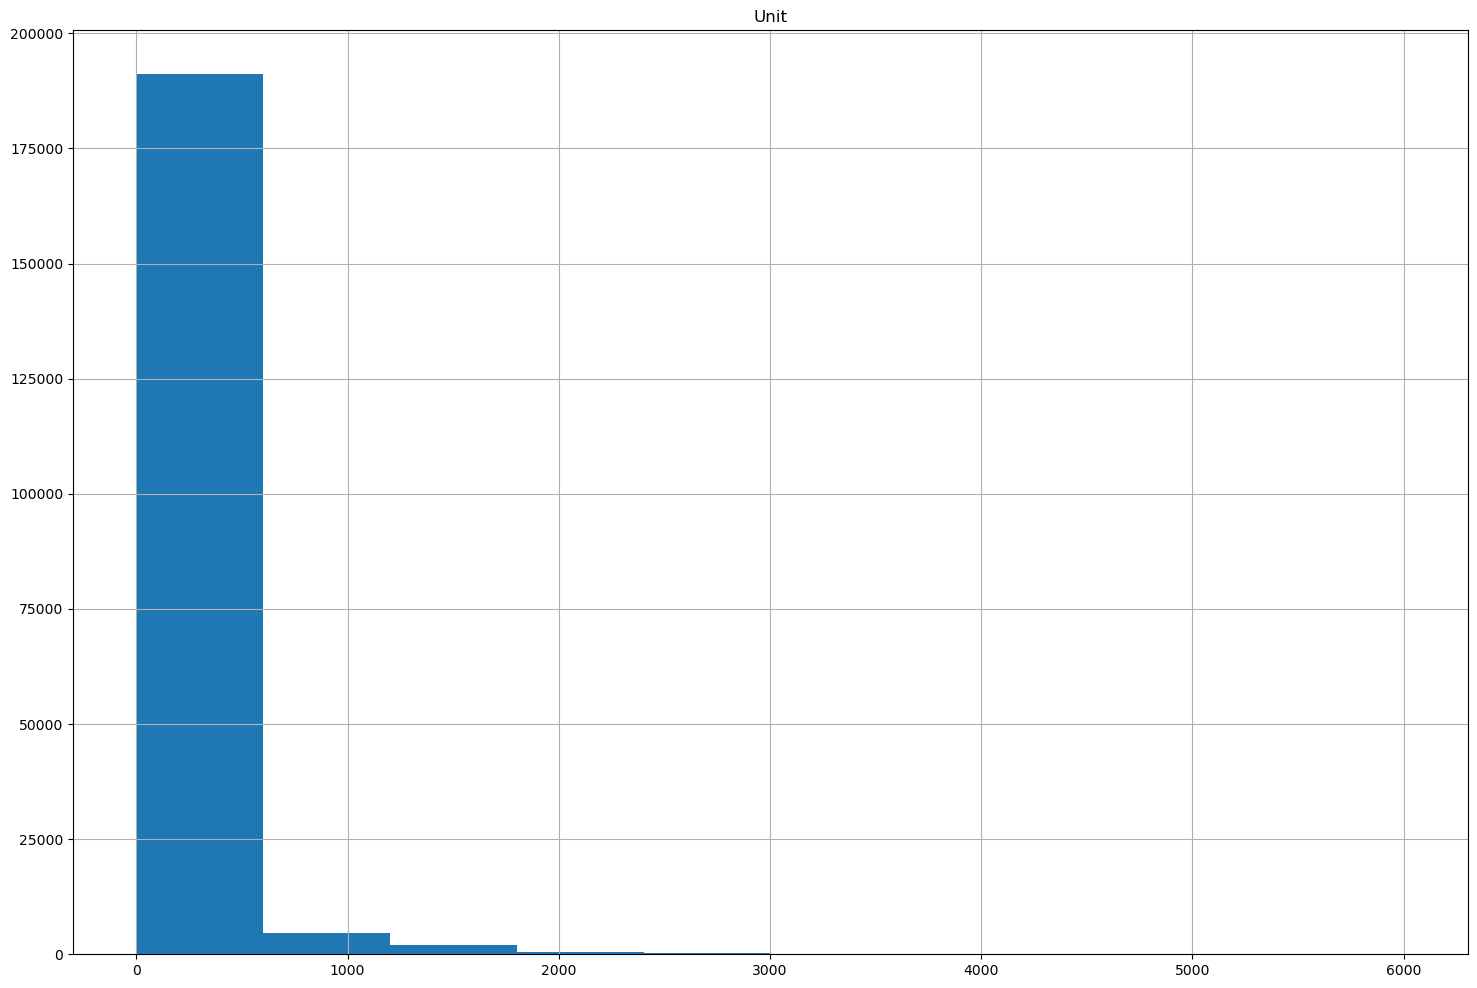

In [21]:
df_filling_na.hist('Unit', figsize=(18,12))

In [14]:
#sns.boxplot(x=df_filling_na['Street Number'], y=df_filling_na['Estimated Cost'])
#plt.xlabel("Street Number",fontsize=14)
#plt.ylabel("Cost",fontsize=14)
#plt.title("Costo por numero de calle",fontsize=24)
#plt.show()

In [15]:
#sns.boxplot(x=df['Street Number'], y=df['Estimated Cost'])
#plt.xlabel("Street Number",fontsize=14)
#plt.ylabel("Cost",fontsize=14)
#plt.title("Costo por numero de calle",fontsize=24)
#plt.show()

In [16]:
for column in df:
    print(df[column].dtype)

object
int64
object
object
object
object
int64
object
object
object
float64
object
object
object
object
object
object
object
object
object
float64
float64
object
object
object
float64
float64
object
float64
object
float64
float64
object
float64
object
float64
object
object
float64
object
float64
object
int64


In [17]:
for column in df:
    if df[column].dtype != object:
        df[column] = df[column].fillna(df[column].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    1989